In [1]:
!nvidia-smi

Wed Jun 29 09:42:38 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
!unzip finale.zip

Archive:  finale.zip
  inflating: finale.csv              


In [36]:
import pandas as pd
df = pd.read_csv("finale.csv", index_col=0)

In [37]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [38]:
df.columns

Index(['Software_Developer', 'Database_Administrator', 'Systems_Administrator',
       'Project_manager', 'Web_Developer', 'Network_Administrator',
       'Security_Analyst', 'Python_Developer', 'Java_Developer',
       'Front_End_Developer', 'Ents', 'new'],
      dtype='object')

In [39]:
classes = ['Software_Developer', 'Database_Administrator',
           'Systems_Administrator', 'Project_manager',
           'Web_Developer', 'Network_Administrator',
           'Security_Analyst', 'Python_Developer',
           'Java_Developer', 'Front_End_Developer']

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29783 entries, 0 to 29782
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Software_Developer      29783 non-null  int64 
 1   Database_Administrator  29783 non-null  int64 
 2   Systems_Administrator   29783 non-null  int64 
 3   Project_manager         29783 non-null  int64 
 4   Web_Developer           29783 non-null  int64 
 5   Network_Administrator   29783 non-null  int64 
 6   Security_Analyst        29783 non-null  int64 
 7   Python_Developer        29783 non-null  int64 
 8   Java_Developer          29783 non-null  int64 
 9   Front_End_Developer     29783 non-null  int64 
 10  Ents                    29783 non-null  object
 11  new                     29721 non-null  object
dtypes: int64(10), object(2)
memory usage: 3.0+ MB


In [41]:
df.shape

(29783, 12)

In [42]:
df['new']

0        sql ssis oltp backing generating log shipping ...
1        microsoft xp microsoft assembly language micro...
2        carrier objective experienced creating users r...
3        amazon redshift administrator redshift adminis...
4        scrum masterscrum master scrum master scrum ma...
                               ...                        
29778    servicenow developerservicenow developerservic...
29779    developerandroid developerjoomla cms samsung w...
29780    ui web developervisual web applications develo...
29781                                                  php
29782    sr software web developerweb developerweb deve...
Name: new, Length: 29783, dtype: object

In [43]:
type(df['new'])

pandas.core.series.Series

In [44]:
for i in range(0,29783):
  if type(df['new'][i]) =="float":
    print("found")

In [45]:
tokenizer = Tokenizer(num_words=1000, lower=True)
tokenizer.fit_on_texts(str(i) for i in df['new'])

In [46]:
tokenizer

In [47]:
sequences = tokenizer.texts_to_sequences(str(i) for i in df['new'])
x = pad_sequences(sequences, maxlen=256)

In [48]:
x

array([[ 41, 391, 153, ...,   4, 716, 891],
       [  0,   0,   0, ...,  32, 134,  30],
       [  0,   0,   0, ...,   4, 141, 432],
       ...,
       [  7, 162,   5, ...,   5,  39, 507],
       [  0,   0,   0, ...,   0,   0,  76],
       [  0,   0,   0, ...,  91,  19,   7]], dtype=int32)

In [49]:
x.shape

(29783, 256)

In [50]:
a=x[0]

In [51]:
a

array([ 41, 391, 153,  41, 502, 206,  77,  88, 236, 121,  30,  51,  77,
        88, 236, 121,  30, 206, 698, 157,   4,  16,  32,   4,  16,   4,
        16,   4,  16, 988, 126, 550, 192, 189, 364, 112, 151,  41,  41,
        97, 433,  79, 151, 221, 513,  16,  16,  32,   4,  16,   4,  16,
         4,  16, 988, 126, 550, 192, 189, 364, 112, 151,  41,  41,  97,
       433,  79, 151, 221, 513,  16,   4,  16,  32, 371, 816, 463, 834,
        41, 391, 153,  41, 199, 502, 206,  51,  77,  88, 236, 121,  30,
       206, 698, 157,   4,  16,  32,   4,  16,   4,  16,   4,  16, 988,
       126, 550, 192, 189, 364, 112, 151,  41,  41,  97, 433,  79, 151,
       221, 513,  16,   4,  16,  32,  16,   4, 633, 216, 463, 184,  44,
       328,   4, 371, 816, 463, 834,  41, 391, 153,  41, 199, 502, 206,
        51,  77,  88, 236, 121,  30, 206, 698, 157,   4,  16,  32,   4,
        16,   4,  16,   4,  16, 988, 126, 550, 192, 189, 364, 112, 151,
        41,  41,  97, 433,  79, 151, 221, 513,  16,   4,  16,  3

In [52]:
df

,Software_Developer,Database_Administrator,Systems_Administrator,Project_manager,Web_Developer,Network_Administrator,Security_Analyst,Python_Developer,Java_Developer,Front_End_Developer,Ents,new
0,0,1,0,0,0,0,0,0,0,0,"[SQL, SSIS, OLTP, Backing, Generating, Log Shi...",sql ssis oltp backing generating log shipping ...
1,0,1,0,0,0,0,0,0,0,0,"[Microsoft, XP Microsoft, Assembly Language Mi...",microsoft xp microsoft assembly language micro...
2,0,1,0,0,0,0,0,0,0,0,"[Carrier Objective, Experienced Creating Users...",carrier objective experienced creating users r...
3,0,1,0,0,0,0,0,0,0,0,"[Amazon Redshift Administrator, yearsPostgresS...",amazon redshift administrator redshift adminis...
4,0,1,0,0,0,0,0,0,0,0,"[Scrum Master, Scrum Master, October April R...",scrum masterscrum master scrum master scrum ma...
...,...,...,...,...,...,...,...,...,...,...,...,...
29778,1,0,0,0,1,0,0,0,1,0,[ServiceNow DeveloperServiceNow DeveloperServi...,servicenow developerservicenow developerservic...
29779,1,0,0,0,1,0,0,0,0,0,"[DeveloperAndroid, DeveloperJoomla CMS, Samsun...",developerandroid developerjoomla cms samsung w...
29780,1,0,0,0,1,0,0,0,0,1,"[UI, WEB, DeveloperVisual, Web Applications De...",ui web developervisual web applications develo...
29781,1,0,0,0,1,0,0,0,0,0,"[September July , PHP]",php


In [53]:
 df[df.columns[:10]]

,Software_Developer,Database_Administrator,Systems_Administrator,Project_manager,Web_Developer,Network_Administrator,Security_Analyst,Python_Developer,Java_Developer,Front_End_Developer
0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
29778,1,0,0,0,1,0,0,0,1,0
29779,1,0,0,0,1,0,0,0,0,0
29780,1,0,0,0,1,0,0,0,0,1
29781,1,0,0,0,1,0,0,0,0,0


In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
x, df[df.columns[:10]], test_size=0.2, random_state=42, shuffle=True)

In [55]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, GlobalMaxPool1D, Dropout
from tensorflow.keras.optimizers import Adam
from keras.regularizers import L2
import tensorflow as tf

In [57]:
model = Sequential()
model.add(Embedding(1000,16, input_length=256))
model.add(GlobalMaxPool1D())
model.add(Dense(256,activation='sigmoid'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='sigmoid'))
model.add(Dropout(0.25))
model.add(Dense(64,activation='sigmoid'))
model.add(Dropout(0.25))
model.add(Dense(64,activation='sigmoid'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='sigmoid'))


In [58]:
model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['Precision','Recall','AUC','Accuracy'])

In [59]:
from keras.utils.vis_utils import plot_model


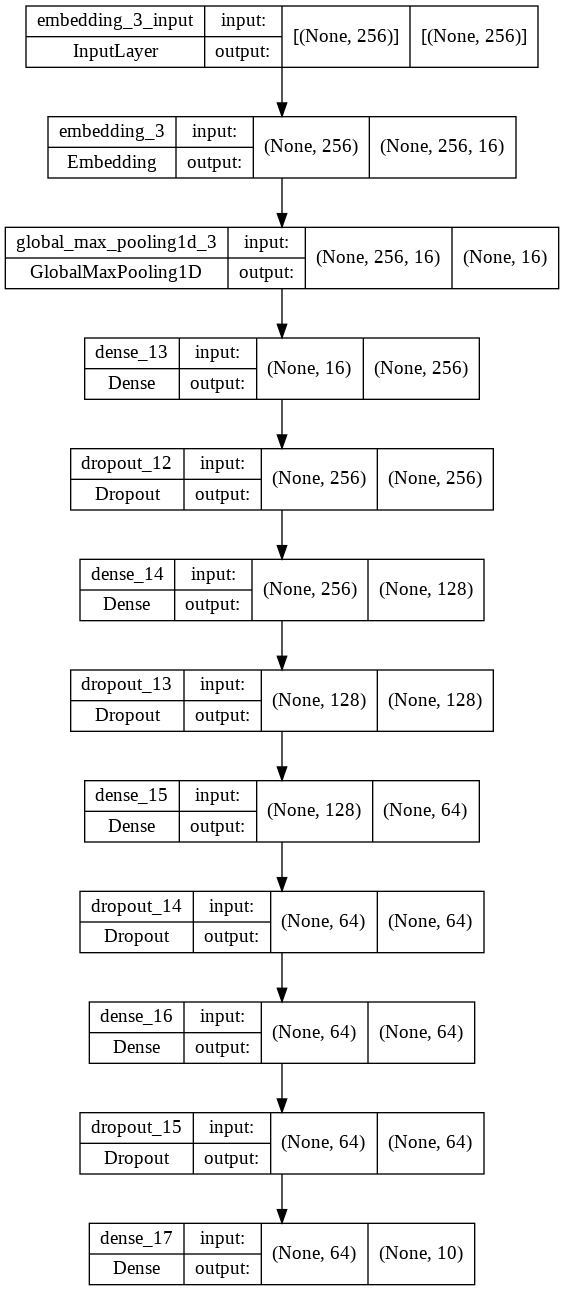

In [60]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [61]:
X_train

array([[  0,   0,   0, ..., 112, 112, 112],
       [906,  32,  10, ..., 653, 423,  46],
       [  0,   0,   0, ...,  16, 269, 178],
       ...,
       [  0,   0,   0, ..., 173,  30, 114],
       [  0,   0,   0, ..., 381,  52,  85],
       [450,  45,  14, ..., 439, 104, 629]], dtype=int32)

In [62]:
y_train

,Software_Developer,Database_Administrator,Systems_Administrator,Project_manager,Web_Developer,Network_Administrator,Security_Analyst,Python_Developer,Java_Developer,Front_End_Developer
1383,0,1,0,0,0,0,0,0,0,0
26541,0,0,1,0,0,0,0,0,0,0
2441,0,1,0,0,0,0,0,0,0,0
21879,1,0,0,0,0,0,0,0,0,0
25193,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
21575,1,0,0,0,0,0,0,0,0,0
5390,1,0,0,0,0,0,0,0,0,1
860,0,1,0,0,0,0,0,0,0,0
15795,0,0,0,0,0,1,0,0,0,0


In [63]:
import numpy as np

In [64]:
y =y_train.values.astype(np.float32)

In [65]:
y

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [66]:
history=model.fit(X_train,y,epochs=100)

Epoch 1/100
745/745 [==============================] - 6s 6ms/step - loss: 0.4144 - precision: 0.5742 - recall: 0.2069 - auc: 0.7171 - Accuracy: 0.5383
Epoch 2/100
745/745 [==============================] - 4s 6ms/step - loss: 0.3046 - precision: 0.7654 - recall: 0.3585 - auc: 0.8711 - Accuracy: 0.6457
Epoch 3/100
745/745 [==============================] - 4s 6ms/step - loss: 0.2917 - precision: 0.7608 - recall: 0.3921 - auc: 0.8852 - Accuracy: 0.6695
Epoch 4/100
745/745 [==============================] - 4s 6ms/step - loss: 0.2848 - precision: 0.7670 - recall: 0.4139 - auc: 0.8921 - Accuracy: 0.6767
Epoch 5/100
745/745 [==============================] - 4s 6ms/step - loss: 0.2765 - precision: 0.7712 - recall: 0.4552 - auc: 0.9009 - Accuracy: 0.6895
Epoch 6/100
745/745 [==============================] - 4s 6ms/step - loss: 0.2688 - precision: 0.7828 - recall: 0.4830 - auc: 0.9079 - Accuracy: 0.7157
Epoch 7/100
745/745 [==============================] - 4s 6ms/step - loss: 0.2594 - prec

In [67]:
model.evaluate(X_test,y_test)

187/187 [==============================] - 1s 4ms/step - loss: 0.1948 - precision: 0.8269 - recall: 0.7349 - auc: 0.9532 - Accuracy: 0.7789


[0.1948038935661316,
 0.8268717527389526,
 0.734883725643158,
 0.9531776309013367,
 0.7789155840873718]

In [68]:
import matplotlib.pyplot as plt

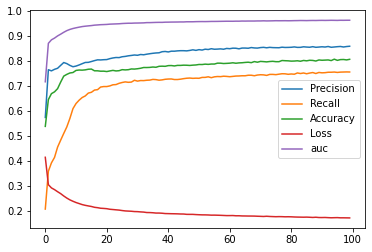

In [69]:
plt.plot(history.history['precision'],label='Precision')
plt.plot(history.history['recall'],label='Recall')
plt.plot(history.history['Accuracy'],label='Accuracy')
plt.plot(history.history['loss'],label='Loss')
plt.plot(history.history['auc'],label='auc')
plt.legend()

In [70]:
y_test=y_test.values.astype(np.float32)

In [71]:
y_test

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [72]:
y_pred=model.predict(X_test)

In [73]:
y_pred

array([[9.9992716e-01, 5.6901533e-04, 2.0406535e-03, ..., 9.7242155e-04,
        9.6786255e-01, 4.9705204e-02],
       [7.3386043e-01, 4.6859160e-01, 1.2364821e-01, ..., 2.7643604e-02,
        1.3667001e-01, 9.3689272e-03],
       [5.3010613e-02, 2.9877800e-02, 4.3823400e-01, ..., 4.1440397e-04,
        5.3562684e-04, 4.6496396e-04],
       ...,
       [1.6926771e-02, 2.4979704e-03, 2.4224038e-01, ..., 4.5578152e-05,
        4.5323814e-05, 1.3150959e-04],
       [1.2698462e-02, 1.3342680e-03, 5.0947040e-02, ..., 1.4496077e-04,
        3.0225815e-06, 8.7791877e-06],
       [9.8022926e-01, 1.4798542e-02, 2.1481790e-02, ..., 2.8038744e-02,
        2.0346597e-02, 7.3981702e-02]], dtype=float32)

In [84]:
normalized = []
for i in y_pred:
    l = []
    for j in i:
        if j>=0.50:
            l.append(1)
        else:
            l.append(0)
    normalized.append(l)

In [85]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
print(metrics.classification_report(y_test, normalized,target_names= classes))

                        precision    recall  f1-score   support

    Software_Developer       0.95      0.93      0.94      2973
Database_Administrator       0.80      0.75      0.78       621
 Systems_Administrator       0.73      0.60      0.66      1215
       Project_manager       0.77      0.52      0.62       911
         Web_Developer       0.71      0.63      0.67      1260
 Network_Administrator       0.73      0.64      0.68       937
      Security_Analyst       0.74      0.57      0.64       605
      Python_Developer       0.86      0.79      0.82       539
        Java_Developer       0.85      0.76      0.80       680
   Front_End_Developer       0.84      0.79      0.81       794

             micro avg       0.83      0.73      0.78     10535
             macro avg       0.80      0.70      0.74     10535
          weighted avg       0.82      0.73      0.77     10535
           samples avg       0.79      0.74      0.74     10535



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix


In [87]:
len(normalized)

5957

In [88]:
classes

['Software_Developer',
 'Database_Administrator',
 'Systems_Administrator',
 'Project_manager',
 'Web_Developer',
 'Network_Administrator',
 'Security_Analyst',
 'Python_Developer',
 'Java_Developer',
 'Front_End_Developer']

ValueError: ignored

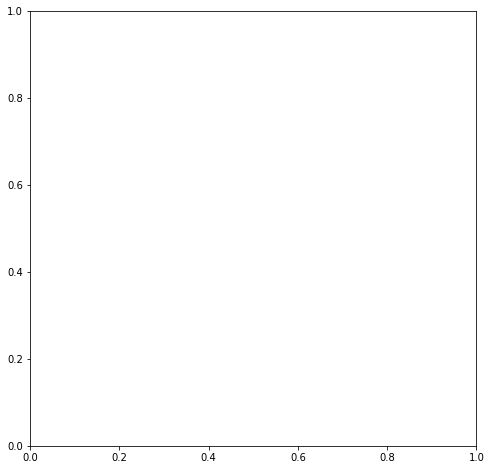

In [89]:
conf_mat = multilabel_confusion_matrix(y_test,normalized)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat,xticklabels=classes, yticklabels=classes)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - DNN", size=16)

In [ ]:
conf_mat.shape

In [90]:
model.save('dnn_mark7.h5')